In [8]:
import pandas as pd
temp = pd.read_csv('resultado_temperatura.csv')
ph = pd.read_csv('resultado_ph.csv')
ox = pd.read_csv('resultado_oxigeno.csv')
df_tabla_unida = temp.merge(ph, on="sitio").merge(ox, on="sitio")
print("tabla de resultados unidos:")
print(df_tabla_unida)

tabla de resultados unidos:
                           sitio  temperatura categoria_temp riesgo_termico  \
0    Quebrada Honda (Facatativá)         19.4         Optima             No   
1                    Río Villeta         28.3           Alta             Si   
2  Quebrada Cune (San Francisco)         25.2           Alta             Si   
3        Río Guayuriba (La Mesa)         30.5           Alta             Si   

    pH clasificacion_pH alerta_quimica  oxigeno nivel_oxigeno riesgo_biologico  
0  6.3            Ácido        Revisar      6.2         Medio       sin riesgo  
1  8.7           Básico        Revisar      6.1         Medio       sin riesgo  
2  6.0            Ácido        Revisar      4.5         Medio           riesgo  
3  5.9            Ácido        Revisar      4.8         Medio           riesgo  


In [10]:
df = df_tabla_unida

def diagnostico(row):
    if 'malo' in [row['riesgo_termico'], row['alerta_quimica'], row['riesgo_biologico']]:
        return 'total'
    elif 'parcial' in [row['riesgo_termico'], row['alerta_quimica'], row['riesgo_biologico']]:
        return 'parcial'
    else:
        return 'normal'

df["diagnostico_final"] = df.apply(diagnostico, axis=1)
df.head()


,sitio,temperatura,categoria_temp,riesgo_termico,pH,clasificacion_pH,alerta_quimica,oxigeno,nivel_oxigeno,riesgo_biologico,diagnostico_final
0,Quebrada Honda (Facatativá),19.4,Optima,No,6.3,Ácido,Revisar,6.2,Medio,sin riesgo,normal
1,Río Villeta,28.3,Alta,Si,8.7,Básico,Revisar,6.1,Medio,sin riesgo,normal
2,Quebrada Cune (San Francisco),25.2,Alta,Si,6.0,Ácido,Revisar,4.5,Medio,riesgo,normal
3,Río Guayuriba (La Mesa),30.5,Alta,Si,5.9,Ácido,Revisar,4.8,Medio,riesgo,normal


In [14]:
df.to_csv("diagnostico_final.csv", index=False, encoding="utf-8")
print("Archivo 'diagnostico_final.csv' exportado correctamente.")



Archivo 'diagnostico_final.csv' exportado correctamente.


In [51]:
conteo = df["diagnostico_final"].value_counts()
print("Conteo de categorías:")
print(conteo)


Conteo de categorías:
diagnostico_final
normal    4
Name: count, dtype: int64


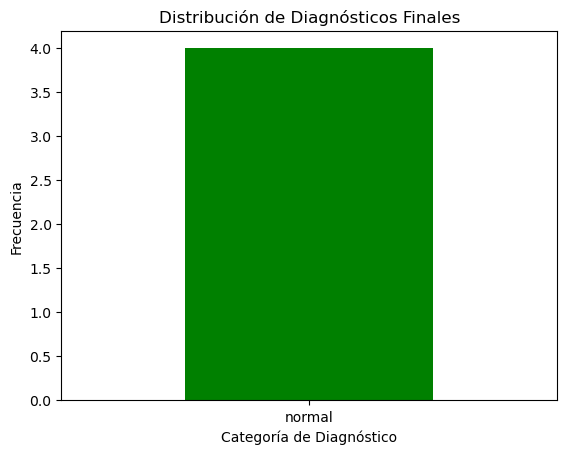

In [53]:
import matplotlib.pyplot as plt

conteo.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribución de Diagnósticos Finales")
plt.xlabel("Categoría de Diagnóstico")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()


In [16]:
# Exportar el DataFrame con el diagnóstico final a un archivo CSV
df.to_csv('resultado_diagnostico_final.csv', index=False, encoding='utf-8')

print("Archivo 'resultado_diagnostico_final.csv' exportado correctamente.")


Archivo 'resultado_diagnostico_final.csv' exportado correctamente.
